# Algoritmos de optimización - Reto 1

Nombre: Juan Carlos Gómez Echevarría<br>
Github: https://github.com/jucargoe<br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás.

In [10]:
# Torres de Hanoi

def hanoi(n, left_tower=1, central_tower=2, right_tower=3, movements=[]):
    if n == 1:
        movements.append((left_tower, right_tower))
    else:
        hanoi(n - 1, left_tower, right_tower, central_tower, movements)
        movements.append((left_tower, right_tower))
        hanoi(n - 1, central_tower, left_tower, right_tower, movements)
    return movements

def print_movements(movements):
    for movement in movements:
        print(f"move disc in tower {movement[0]} to tower {movement[1]}")

movements = hanoi(3)
print("Example 1")
print("Solution for hanoi tower with 3 discs")
print_movements(movements)

print("")
movements = hanoi(4)
print("Example 2")
print("Solution for hanoi tower with 4 discs")
print_movements(movements)


Example 1
Solution for hanoi tower with 3 discs
move disc in tower 1 to tower 3
move disc in tower 1 to tower 2
move disc in tower 3 to tower 2
move disc in tower 1 to tower 3
move disc in tower 2 to tower 1
move disc in tower 2 to tower 3
move disc in tower 1 to tower 3

Example 2
Solution for hanoi tower with 4 discs
move disc in tower 1 to tower 3
move disc in tower 1 to tower 2
move disc in tower 3 to tower 2
move disc in tower 1 to tower 3
move disc in tower 2 to tower 1
move disc in tower 2 to tower 3
move disc in tower 1 to tower 3
move disc in tower 1 to tower 2
move disc in tower 1 to tower 3
move disc in tower 2 to tower 3
move disc in tower 1 to tower 2
move disc in tower 3 to tower 1
move disc in tower 3 to tower 2
move disc in tower 1 to tower 2
move disc in tower 1 to tower 3
move disc in tower 2 to tower 3
move disc in tower 2 to tower 1
move disc in tower 3 to tower 1
move disc in tower 2 to tower 3
move disc in tower 1 to tower 2
move disc in tower 1 to tower 3
move di

## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos.

Example 1
Iterative result for n-term 500:  139423224561697880139724382870407283950070256587697307264108962948325571622863290691557658876222521294125
Recursive result for n-term 500:  139423224561697880139724382870407283950070256587697307264108962948325571622863290691557658876222521294125

Example 2


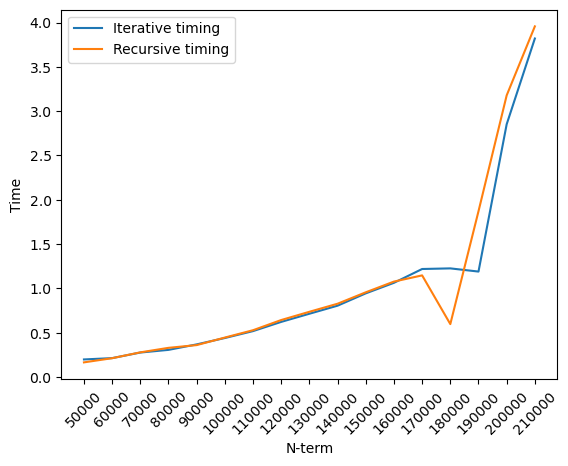

In [12]:
import matplotlib.pyplot as plt
import time
import sys
sys.set_int_max_str_digits(0)
sys.setrecursionlimit(1000000)

#Sucesión_de_Fibonacci

def iterative(N):
    previous = 1
    historic = [0]
    for x in range(N):
        last_calc = historic[-1]
        historic.append(last_calc + previous)
        previous = last_calc

    return historic[-1]

def recursive(historic, previous, N, iteration):
    if N != iteration:
        last_calc = historic[-1]
        historic.append(last_calc + previous)
        previous = last_calc
        result = recursive(historic, previous, N, iteration+1)
    else:
        result = historic[-1]

    return result

# cálculo simple
number = 500
print("Example 1")
print(f"Iterative result for n-term {number}: ", iterative(number))
print(f"Recursive result for n-term {number}: ", recursive([0], 1, number, 0))

print("")

# tiempos de cálculo
print("Example 2")
start = 50000
end = 220000
step = 10000
iterative_timing = {}
recursive_timing = {}
for i in range(start, end, step):
    start = time.time()
    iterative(i)
    iterative_timing[i] = time.time()-start

    start = time.time()
    recursive([0], 1, i, 0)
    recursive_timing[i] = time.time()-start


plt.plot(range(len(iterative_timing)), list(iterative_timing.values()))
plt.plot(range(len(recursive_timing)), list(recursive_timing.values()))
plt.xticks(range(len(iterative_timing)), list(iterative_timing.keys()), rotation=45)
plt.legend(labels=["Iterative timing", "Recursive timing"])
plt.xlabel("N-term")
plt.ylabel("Time")
plt.show()


## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [16]:
# Problema del cambio de moneda
def select_coin(C):
    selected = .0
    options = [2.0, 1.0, .5, .2, .1, .05, .02, .01]
    for option in options:
        check = C - option
        if check >= 0:
            selected = option
            break

    return selected

def calculate_devolution(C):
    S = []
    print(f"Change of {C}: ")
    while C != 0:
        x = select_coin(C)
        C = round(C - x, 2)
        if x > 0:
            S.append(x)
    
    return S

print("Example 1")
print(calculate_devolution(5.71))

print("\nExample 2")
print(calculate_devolution(3.33))



Example 1
Change of 5.71: 
[2.0, 2.0, 1.0, 0.5, 0.2, 0.01]

Example 2
Change of 3.33: 
[2.0, 1.0, 0.2, 0.1, 0.02, 0.01]


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [25]:
# Problema de las N-Reinas
from IPython.display import clear_output
import random
import time

N = 8
print_delay = 0.04
iterations = 0

def print_queens_position(queens_positions=[]):
    clear_output(wait=True)
    print(f"iterations: {iterations}")
    for y in range(N):
        for x in range(N):
            if (x, y) in queens_positions:
                element = "Q "
            else:
                element = "_ "
            print(element, end="")
        print("")
    time.sleep(print_delay)


def check_axis_availability(x, y, queens_positions):
    # check if another queen is placed horinzontally, vertically or diagonally
    available = True
    for pos in range(0, N, 1):
        if (pos, y) in queens_positions \
        or (x, pos) in queens_positions \
        or (x+pos, y+pos) in queens_positions \
        or (x-pos, y-pos) in queens_positions \
        or (x+pos, y-pos) in queens_positions \
        or (x-pos, y+pos) in queens_positions:
            available = False
            break

    return available


def check_position_availability(x, y, queens_positions):
    # check if x and y is not in queen positions and check if x and y can be a solution
    return (x, y) not in queens_positions \
            and check_axis_availability(x, y, queens_positions)


def search_queens_positions(queens_positions=[], x=0, N_queens=4):
    if x >= N_queens:
        found = queens_positions
    else:
        global iterations
        for y in range(N):
            # add iteration to counter
            iterations += 1
            
            # print actual chess desk
            list_for_print = queens_positions.copy()
            list_for_print.append((x, y))
            print_queens_position(list_for_print)

            # check if position can be used
            if check_position_availability(x, y, queens_positions):
                # if position can be used, add position to list and search new position in new sub level.
                # if new sub level is a found solution, return it
                queens_positions.append((x, y))
                found = search_queens_positions(queens_positions, x+1, N_queens)
                if found:
                    return found

        # if cannot find available position in the loop, remove the last queen and return false
        queens_positions.pop()
        print_queens_position(queens_positions)
        found = False
    return found

print("Example 1:")
print(search_queens_positions([], 0, 4))

iterations: 11
Q _ _ _ _ _ _ _ 
_ _ _ Q _ _ _ _ 
_ Q _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ 
_ _ Q _ _ _ _ _ 
_ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ 
_ _ _ _ _ _ _ _ 
[(0, 0), (1, 2), (2, 4), (3, 1)]


In [26]:
iterations = 0
print("Example 2:")
print(search_queens_positions([], 0, 8))

iterations: 876
Q _ _ _ _ _ _ _ 
_ _ _ _ _ _ Q _ 
_ _ _ _ Q _ _ _ 
_ _ _ _ _ _ _ Q 
_ Q _ _ _ _ _ _ 
_ _ _ Q _ _ _ _ 
_ _ _ _ _ Q _ _ 
_ _ Q _ _ _ _ _ 
[(0, 0), (1, 4), (2, 7), (3, 5), (4, 2), (5, 6), (6, 1), (7, 3)]
